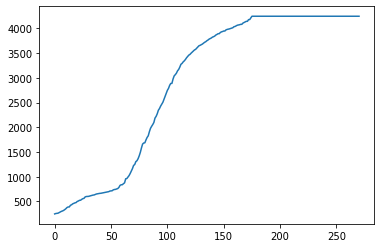

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('Covid19Data/Oran.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
dataframe = pandas.read_csv('Covid19Data/Oran.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

181 90


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [10]:

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
179/179 - 3s - loss: 0.1145
Epoch 2/100
179/179 - 0s - loss: 0.0341
Epoch 3/100
179/179 - 0s - loss: 0.0185
Epoch 4/100
179/179 - 0s - loss: 0.0090
Epoch 5/100
179/179 - 0s - loss: 0.0032
Epoch 6/100
179/179 - 0s - loss: 8.7306e-04
Epoch 7/100
179/179 - 0s - loss: 1.9427e-04
Epoch 8/100
179/179 - 0s - loss: 6.6494e-05
Epoch 9/100
179/179 - 0s - loss: 4.9788e-05
Epoch 10/100
179/179 - 0s - loss: 4.7538e-05
Epoch 11/100
179/179 - 0s - loss: 4.7424e-05
Epoch 12/100
179/179 - 0s - loss: 4.5700e-05
Epoch 13/100
179/179 - 0s - loss: 4.4871e-05
Epoch 14/100
179/179 - 0s - loss: 4.4132e-05
Epoch 15/100
179/179 - 0s - loss: 4.2741e-05
Epoch 16/100
179/179 - 0s - loss: 4.2747e-05
Epoch 17/100
179/179 - 0s - loss: 4.1720e-05
Epoch 18/100
179/179 - 0s - loss: 4.1048e-05
Epoch 19/100
179/179 - 0s - loss: 3.8389e-05
Epoch 20/100
179/179 - 0s - loss: 3.8911e-05
Epoch 21/100
179/179 - 0s - loss: 3.8307e-05
Epoch 22/100
179/179 - 0s - loss: 3.7241e-05
Epoch 23/100
179/179 - 0s - loss: 3.542

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25.41 RMSE
Test Score: 0.37 RMSE


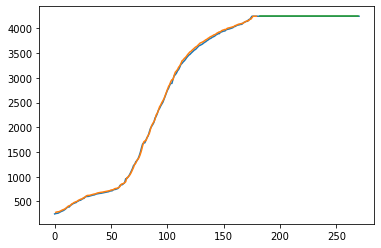

In [12]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
